# Linear Regression

To simplify, Linear Regression is simply a weighted sum of inputs plus a constant:


$\hat{y} = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_2 + ... + \beta_{n}x_n$


### Simple Linear Regression

Creating a simple one dimentional function of a linear relation between X and y: 

$\hat{y} = \beta_{0} + \beta_{1}x_1 $

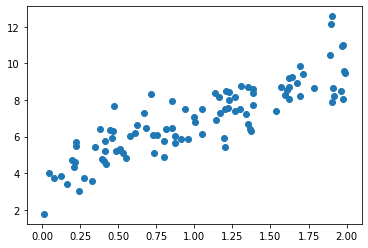

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100) 
y = 4 + 3 * X + np.random.randn(100)

data = pd.DataFrame({'covariate':X, 'response':y})

plt.scatter(X, y)

### Least Squares Estimates

the least squares estimates for $\theta_{0}$ and $\theta_{1}$ is:

$\beta_{0} = \frac{\sum_{i=0}^{n}(X_i - \hat{X_n})(Y_i - \hat{Y_n})}{\sum_{i=0}^{n}(X_i - \hat{X_n})^2} $

$\beta_{1} = \hat{Y_n} - \beta_{0} * \hat{X_n} $


In [2]:
def deviation(array):
    return [x-np.mean(array) for x in array]

def squared_deviation(array):
    return [(x-np.mean(array))**2 for x in array]

print(deviation(X)[:4])
print(squared_deviation(X)[:4])

[-0.1670331353335628, -0.5578494767569666, -0.10998636221811009, 0.24687879305369953]
[0.0279000682993603, 0.31119603871802143, 0.012096999873973314, 0.0609491384596514]


In [3]:
def least_squares_fit(X, y):
    numerator = np.sum([x_dev*y_dev for x_dev, y_dev in zip(deviation(X), deviation(y))])
    denominator = np.sum(squared_deviation(X))
    
    slope = numerator/denominator

    intercept = np.mean(y) - slope * np.mean(X) 

    return intercept, slope

least_squares_fit(X, y)

(3.89172931216392, 2.980169024403981)

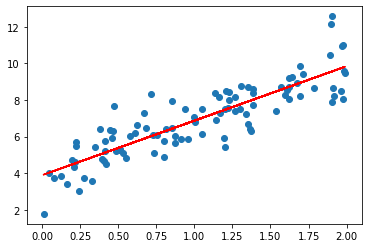

In [4]:
intercept, slope = least_squares_fit(X, y)

y_pred = intercept + X*slope

plt.scatter(X,y)
plt.plot(X, y_pred, color='red')

### Plot the residuals

The error term or residuals assume to be:

* Normally distributed
* Homoscedastic (same variance for every X)
* Independent 


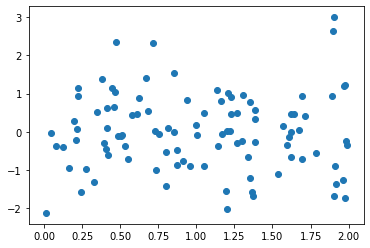

In [5]:
residuals = [ (real - pred) for real, pred in zip(y, y_pred)]
plt.scatter(X, residuals)

There is no trend or variance changing for X 

In [6]:
pd.Series(residuals).describe()

count    1.000000e+02
mean    -1.003642e-15
std      9.969978e-01
min     -2.132651e+00
25%     -6.532030e-01
50%     -4.313630e-02
75%      5.808731e-01
max      3.010664e+00
dtype: float64

(array([ 5.,  8., 14., 21., 18., 19., 10.,  1.,  2.,  2.]),
 array([-2.13265094, -1.61831948, -1.10398802, -0.58965655, -0.07532509,
         0.43900637,  0.95333783,  1.46766929,  1.98200075,  2.49633221,
         3.01066367]),
 <a list of 10 Patch objects>)

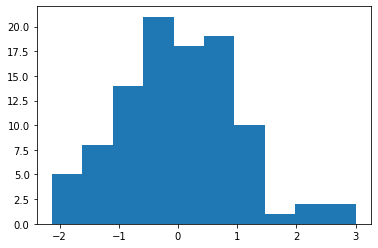

In [7]:
plt.hist(residuals)

The hist seem like to have a small skeweness to the left (Negative skewed)

In [8]:
def RSS(y, y_pred):
    square_erors = [ (real - pred)**2 for real, pred in zip(y, y_pred)]
    return sum(square_erors)

def RSE(y, y_pred):
    rss = RSS(y, y_pred)
    return np.sqrt(rss/(len(y)-2))

rse = RSE(y, y_pred)
print(rse)

1.0020715761068804


In [9]:
se_intercept = rse * (1/len(X) + np.average(X)/np.sum(squared_deviation(X)))
se_slope = rse * 1/np.sum(squared_deviation(X))

print('SE Intercept: {}\nSE slope: {}'.format(se_intercept, se_slope))

SE Intercept: 0.041277019754118884
SE slope: 0.030570933317030122


## Test statistic

The test statistic is a t statistic (t) defined by the following equation:

$t = \frac{\hat{\beta_1} - 0}{ SE(\beta_1) } $

$t = \frac{\hat{\beta_0} - 0}{ SE(\beta_0) } $


In [21]:
t_intercept = intercept/se_intercept
t_slope = slope/se_slope

print('t intercept: {}\nt_slope: {}'.format(t_intercept, t_slope))

t intercept: 94.28319523420967
t_slope: 97.48374357755775


## P-value

Based on the t statistic test statistic and the degrees of freedom, we determine the P-value. 

The P-value is the probability that a t statistic having DF degrees of freedom is more extreme than t. Since this is a two-tailed test, "more extreme" means greater than t or less than -t.

In [19]:
from scipy import stats

# deegres of fredom
df = len(X) - 2

#p-value after comparison with the t 
p_intercept = 2*(1 - stats.t.cdf(t_intercept, df=df))
p_slope = 2*(1 - stats.t.cdf(t_slope, df=df))

print("P-value intercept:{}\np-value slope:{}".format(p_intercept, p_slope))

P-value intercept:0.0
p-value slope:0.0


We interpret the p-value as follows: a small p-value indicates that it is unlikely to observe such a substantial association between the predictor and the response due to chance, in the absence of any real association between the predictor and the response.

In [26]:
pd.DataFrame([[intercept, se_intercept, t_intercept, p_intercept],
[slope, se_slope, t_slope, p_slope],], columns=['Coef', 'SE Coef', 't value', 'p-value'], index=['Intercept', 'Slope'])


,Coef,SE Coef,t value,p-value
Intercept,3.891729,0.041277,94.283195,0.0
Slope,2.980169,0.030571,97.483744,0.0
